- Sometimes, you need a little help picking out your outfit! For those hard to style shirts, you can upload a pic here and get some inspiration for what colors coordinate best!

Steps:
- remove background using https://www.remove.bg/upload
- detect top 8 most frequent color with 
	https://analyticsindiamag.com/guide-to-image-color-analyzer-in-python/
- convert RGB to hex using
	https://www.codespeedy.com/convert-rgb-to-hex-color-code-in-python/
- find complementary colors with 
	https://itsphbytes.wordpress.com/2016/08/29/complementary-colors-python-code/
- display piechart with complementary colors 


In [ ]:
 import imageio
 import matplotlib.pyplot as plt
 import numpy as np
 from sklearn.cluster import KMeans
 import cv2
 from skimage.color import rgb2lab, deltaE_cie76
 from collections import Counter
 import os 

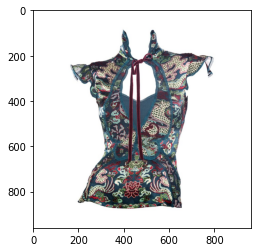

In [ ]:
image = cv2.imread('/content/top2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image) 

In [ ]:
 def RGB_HEX(color):
     return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2])) 

In [ ]:
 def get_colors(image, number_of_colors, show_chart):
     reshaped_image = cv2.resize(image, (600, 400))
     reshaped_image = reshaped_image.reshape(reshaped_image.shape[0]*reshaped_image.shape[1], 3)
     clf = KMeans(n_clusters = number_of_colors)
     labels = clf.fit_predict(reshaped_image)
     counts = Counter(labels)
     counts = dict(sorted(counts.items()))
     center_colors = clf.cluster_centers_
     ordered_colors = [center_colors[i] for i in counts.keys()]
     hex_colors = [RGB_HEX(ordered_colors[i]) for i in counts.keys()]
     rgb_colors = [ordered_colors[i] for i in counts.keys()]
     if (show_chart):
         plt.figure(figsize = (8, 6))
         plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
     return rgb_colors 

[array([254.79886394, 254.8124569 , 254.73327762]), array([113.40219117,  60.74134646,  71.12083201]), array([213.06757156, 210.16096194, 201.05709649]), array([161.63278033, 163.77044358, 158.23943993]), array([48.06190848, 33.07745073, 40.85299991]), array([ 67.36262416,  91.0916373 , 101.10966037]), array([49.21914821, 62.32497445, 70.68783646]), array([121.53076121, 121.92028734, 120.25327309])]


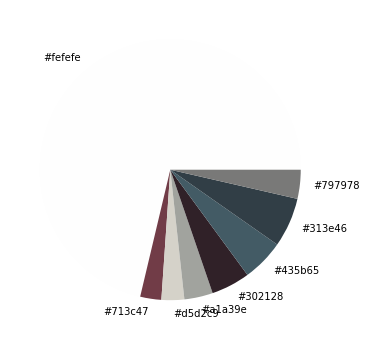

In [ ]:
output = get_colors(image, 8, True)
print(output)

In [ ]:
#Deepa: convert each RGB to a hexcode
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

def makehexlist(output):
  hexlist = []
  for color in output:
    arg = (int(color[0]), int(color[1]), int(color[2]))
    hexlist.append(('#' + rgb_to_hex(arg)))
  return hexlist
hexlist = makehexlist(output)
print(hexlist)

['#fefefe', '#713c47', '#d5d2c9', '#a1a39e', '#302128', '#435b65', '#313e46', '#797978']


['#010101', '#8EC3B8', '#2A2D36', '#5E5C61', '#CFDED7', '#BCA49A', '#CEC1B9', '#868687']


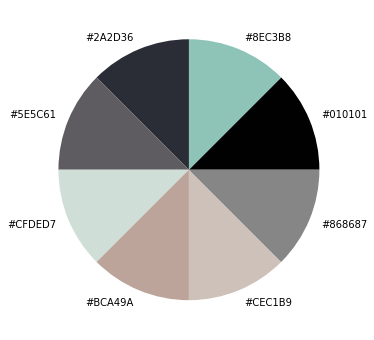

In [ ]:
#Deepa: create dictionary for each color with the value being the complementary color
def get_complementary(color):
    # strip the # from the beginning
    color = color[1:]

    # convert the string into hex
    color = int(color, 16)
 
    # invert the three bytes
    # as good as substracting each of RGB component by 255(FF)
    comp_color = 0xFFFFFF ^ color
 
    # convert the color back to hex by prefixing a #
    comp_color = "#%06X" % comp_color
 
    # return the result
    return comp_color

def makecomplementslist(hexlist):
  complements = []
  for hexcode in hexlist:
    complements.append(get_complementary(hexcode))
  return complements
complements = makecomplementslist(hexlist)
print(complements)

#Deepa: create piechart with complementary colors
plt.figure(figsize = (8, 6))
plt.pie([1 for color in complements], labels = complements, colors = complements)
plt.show()

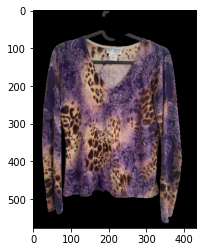

In [ ]:
#Deepa: trying out with some of my own tops
deepa1 = cv2.imread('/content/deepa1.png')
deepa1 = cv2.cvtColor(deepa1, cv2.COLOR_BGR2RGB)
plt.imshow(deepa1) 

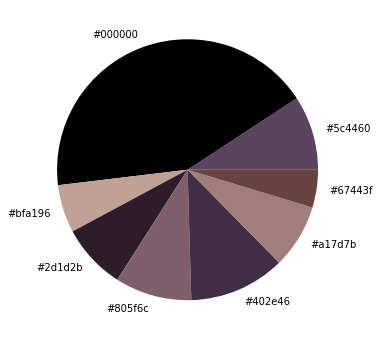

In [ ]:
deepa1output = get_colors(deepa1, 8, True)

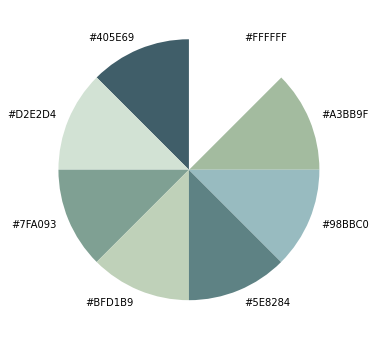

In [ ]:
deepa1hexlist = makehexlist(deepa1output)
deepa1complements = makecomplementslist(deepa1hexlist)
plt.figure(figsize = (8, 6))
plt.pie([1 for color in deepa1complements], labels = deepa1complements, colors = deepa1complements)
plt.show()

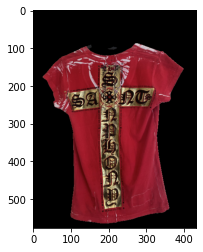

In [ ]:
deepa2 = cv2.imread('/content/deepa2.png')
deepa2 = cv2.cvtColor(deepa2, cv2.COLOR_BGR2RGB)
plt.imshow(deepa2) 

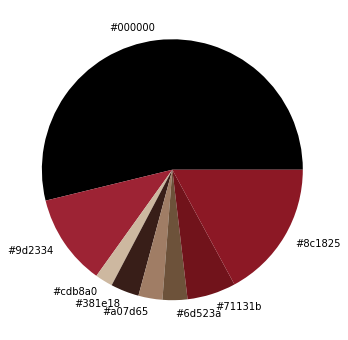

In [ ]:
deepa2output = get_colors(deepa2, 8, True)

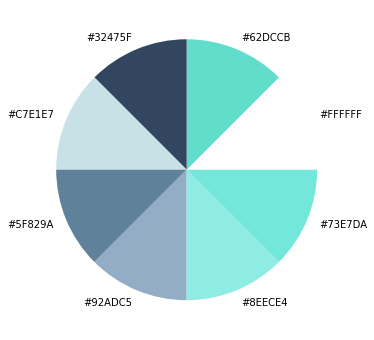

In [ ]:
deepa2hexlist = makehexlist(deepa2output)
deepa2complements = makecomplementslist(deepa2hexlist)
plt.figure(figsize = (8, 6))
plt.pie([1 for color in deepa2complements], labels = deepa2complements, colors = deepa2complements)
plt.show()

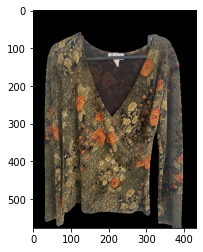

In [ ]:
deepa3 = cv2.imread('/content/deepa3.png')
deepa3 = cv2.cvtColor(deepa3, cv2.COLOR_BGR2RGB)
plt.imshow(deepa3) 

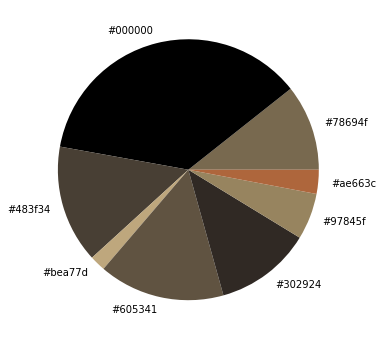

In [ ]:
deepa3output = get_colors(deepa3, 8, True)

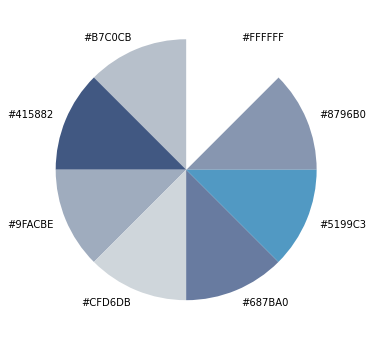

In [ ]:
deepa3hexlist = makehexlist(deepa3output)
deepa3complements = makecomplementslist(deepa3hexlist)
plt.figure(figsize = (8, 6))
plt.pie([1 for color in deepa3complements], labels = deepa3complements, colors = deepa3complements)
plt.show()